# Importing the Dependencies

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score

C:\Users\HP 2021\anaconda3\lib\site-packages\scipy\__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.4)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


# Data collection and analysis

In [2]:
#loading the dataset to a pandas dataframe
diabetes_dataset=pd.read_csv(r'C:\Users\HP 2021\Downloads\diabetes (1).csv')

In [3]:
#printing the first 5 rows in dataset
diabetes_dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
#number of rows and columns
diabetes_dataset.shape

(768, 9)

768 rows and 9 columns

In [5]:
#applying statistical measures
diabetes_dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
diabetes_dataset['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

0-->Non Diabetic
1-->Diabetic

In [7]:
diabetes_dataset.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


important note:there are relation when glucose column ratio increse  the patient may be  diabetic but glucose decrese the patient may be non diabetic .

In [8]:
#Seperating the data and labels
X=diabetes_dataset.drop('Outcome',axis='columns')
y=diabetes_dataset['Outcome']

In [9]:
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [10]:
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

<AxesSubplot:>

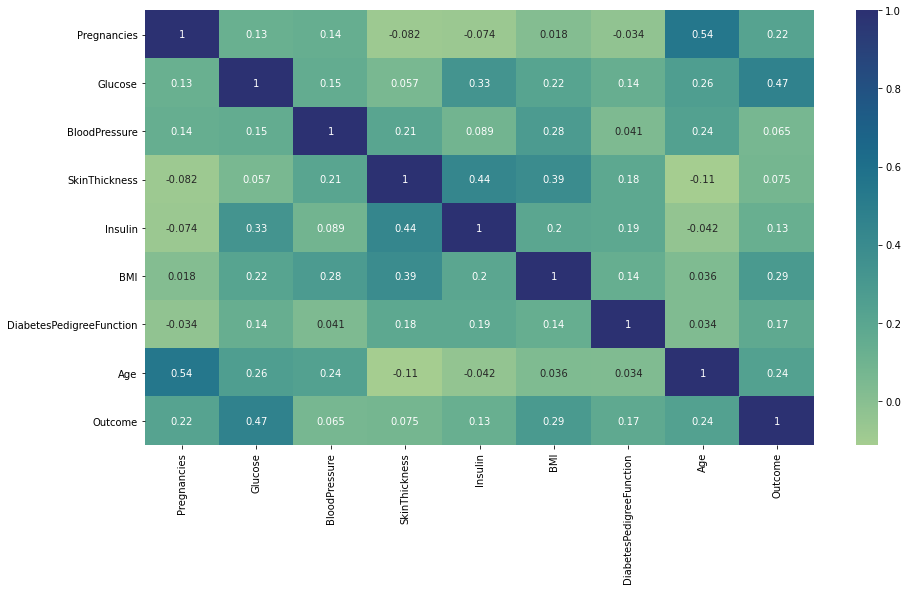

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(15,8))
sns.heatmap(diabetes_dataset.corr(),annot=True,cmap="crest")

# standardization

In [12]:
scaler=StandardScaler()

In [13]:
scaler.fit(X)

StandardScaler()

In [14]:
standardization=scaler.transform(X)

In [15]:
standardization

array([[ 0.63994726,  0.84832379,  0.14964075, ...,  0.20401277,
         0.46849198,  1.4259954 ],
       [-0.84488505, -1.12339636, -0.16054575, ..., -0.68442195,
        -0.36506078, -0.19067191],
       [ 1.23388019,  1.94372388, -0.26394125, ..., -1.10325546,
         0.60439732, -0.10558415],
       ...,
       [ 0.3429808 ,  0.00330087,  0.14964075, ..., -0.73518964,
        -0.68519336, -0.27575966],
       [-0.84488505,  0.1597866 , -0.47073225, ..., -0.24020459,
        -0.37110101,  1.17073215],
       [-0.84488505, -0.8730192 ,  0.04624525, ..., -0.20212881,
        -0.47378505, -0.87137393]])

In [16]:
X=standardization
y=diabetes_dataset['Outcome']

# Splitting data into training and testing

In [17]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,stratify=y,random_state=2)

In [18]:
X.shape,X_train.shape,X_test.shape

((768, 8), (614, 8), (154, 8))

# Training data

In [19]:
Model=svm.SVC(kernel='linear')
Model.fit(X_train,y_train)

SVC(kernel='linear')

# Evalution Data

Accuracy Score

In [20]:
X_Train_prediction=Model.predict(X_train)
training_data_accuracy=accuracy_score(X_Train_prediction,y_train)

In [21]:
print("Accuracy Score of the train data is :",training_data_accuracy)

Accuracy Score of the train data is : 0.7866449511400652


In [22]:
X_test_prediction=Model.predict(X_test)
test_data_accuracy=accuracy_score(X_test_prediction,y_test)

In [23]:
print("Accuracy Score of the test data is :",test_data_accuracy)

Accuracy Score of the test data is : 0.7727272727272727


# Making a Predictive System

In [24]:
input_data=(10,168,74,0,0,38,0.537,34)

#Changing the input_data to a numpy array
input_data_as_numpy_array=np.asarray(input_data) #The numpy.asarray() function is used to convert n given input to an array.

#reshape the array as we are predicting the one instance
input_data_reshaped=input_data_as_numpy_array.reshape(1,-1)

#Standarize the input data
std_data=scaler.transform(input_data_reshaped)
print(std_data)

prediction=Model.predict(std_data)
print(prediction)

if(prediction[0]==0):
    print('The person is Non diabetic')
else:
    print('The person is diabetic')

[[ 1.82781311  1.4742667   0.25303625 -1.28821221 -0.69289057  0.76245745
   0.1966813   0.06459135]]
[1]
The person is diabetic


C:\Users\HP 2021\anaconda3\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


# Saved the trained model

In [25]:
import pickle

In [26]:
filename='trained_model.sav'
pickle.dump(Model,open(filename,'wb'))

In [28]:
#loading the saved model
loaded_model=pickle.load(open('trained_model.sav','rb'))

In [30]:
input_data=(10,168,74,0,0,38,0.537,34)

#Changing the input_data to a numpy array
input_data_as_numpy_array=np.asarray(input_data) #The numpy.asarray() function is used to convert n given input to an array.

#reshape the array as we are predicting the one instance
input_data_reshaped=input_data_as_numpy_array.reshape(1,-1)

#Standarize the input data
std_data=scaler.transform(input_data_reshaped)
print(std_data)

prediction=loaded_model.predict(std_data)
print(prediction)

if(prediction[0]==0):
    print('The person is Non diabetic')
else:
    print('The person is diabetic')

[[ 1.82781311  1.4742667   0.25303625 -1.28821221 -0.69289057  0.76245745
   0.1966813   0.06459135]]
[1]
The person is diabetic


C:\Users\HP 2021\anaconda3\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
